<h1><center>Social Data Science - Project</center></h1>
<h2><center>Road Accidents in Great Britain</center></h2>
*By **Janus, Gautam and Mathias** *

## Import Package

In [68]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

## Import data:
Our data is available at [Great Britian Road Accident Data](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) in which we take the need URLs for each CSV file. 

However, we were unable to unpack a ZIP file containing multiple files for the periode 2005 to 2014. Hence, The needed files are store on our desktop and imported into python.

In [52]:
# url = 'http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2016.zip'
# nu = re.findall("[_].+[A-Za-z].+\d",url)
# st1 = ''.join(nu)
# print(st1) 

url = ["http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip","http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip",
       "http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Vehicles_2015.zip","http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Accidents_2015.zip"]

####Figure out how to download the 05-14 and save it in your memory or get the fucking zip thing to work
vehicles_2016 = pd.read_csv(url[0], compression='zip')
accidents_2016 = pd.read_csv(url[1], compression='zip')
vehicles_2015 = pd.read_csv(url[2], compression='zip')
accidents_2015 = pd.read_csv(url[3], compression='zip')
vehicles_05_14 = pd.read_csv("/Users/jarand/Documents/Stud.Polit/Social Data Science/EXAM/Vehicles0514.csv")
accidents_05_14 = pd.read_csv("/Users/jarand/Documents/Stud.Polit/Social Data Science/EXAM/Accidents0514.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Filtering and Adjusting the Data:
- Each files contains around 30 columns
- Many columns which are not needed 
- Due to large files, we filter and adjust each file seperately before merging them

In [53]:
# Filtering the columns we need and dropping the rest

vehicles_2016 = vehicles_2016[['Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle','Vehicle_Type']]
accidents_2016 = accidents_2016[['Accident_Index','Day_of_Week','Time','1st_Road_Class','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Number_of_Casualties', 'Accident_Severity']]

vehicles_2015 = vehicles_2015[['Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle','Vehicle_Type']]
accidents_2015 = accidents_2015[['Accident_Index','Day_of_Week','Time','1st_Road_Class','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Number_of_Casualties', 'Accident_Severity']]

vehicles_05_14 = vehicles_05_14[['Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle','Vehicle_Type']]
accidents_05_14 = accidents_05_14[['Accident_Index','Day_of_Week','Time','1st_Road_Class','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Number_of_Casualties', 'Accident_Severity']]

In [54]:
# Removing Sex_of_Driver = -1 & 3 which mean data missing and Not known

vehicles_2016 = vehicles_2016[(vehicles_2016['Sex_of_Driver']==1) | (vehicles_2016['Sex_of_Driver']==2)]

vehicles_2015 = vehicles_2015[(vehicles_2015['Sex_of_Driver']==1) | (vehicles_2015['Sex_of_Driver']==2)]

vehicles_05_14 = vehicles_05_14[(vehicles_05_14['Sex_of_Driver']==1) | (vehicles_05_14['Sex_of_Driver']==2)]

In [55]:
# Removing missing data values from Age_of_Driver

vehicles_2016 = vehicles_2016[(vehicles_2016['Age_of_Driver']!=-1)]

vehicles_2015 = vehicles_2015[(vehicles_2015['Age_of_Driver']!=-1)]

vehicles_05_14 = vehicles_05_14[(vehicles_05_14['Age_of_Driver']!=-1)]

In [56]:
#Removing missing values from the Age_of_Vehicle

vehicles_2016 = vehicles_2016[(vehicles_2016['Age_of_Vehicle']!=-1)]

vehicles_2015 = vehicles_2015[(vehicles_2015['Age_of_Vehicle']!=-1)]

vehicles_05_14 = vehicles_05_14[(vehicles_05_14['Age_of_Vehicle']!=-1)]

In [57]:
#Filtering the Vehicle_Type down to Cars and Bikes 

vehicles_2016 = vehicles_2016[(vehicles_2016['Vehicle_Type']==2) | (vehicles_2016['Vehicle_Type']==3) | (vehicles_2016['Vehicle_Type']==4) | (vehicles_2016['Vehicle_Type']==5) | (vehicles_2016['Vehicle_Type']==8) | (vehicles_2016['Vehicle_Type']==9) | (vehicles_2016['Vehicle_Type']==22) | (vehicles_2016['Vehicle_Type']==23) | (vehicles_2016['Vehicle_Type']==97)]

vehicles_2015 = vehicles_2015[(vehicles_2015['Vehicle_Type']==2) | (vehicles_2015['Vehicle_Type']==3) | (vehicles_2015['Vehicle_Type']==4) | (vehicles_2015['Vehicle_Type']==5) | (vehicles_2015['Vehicle_Type']==8) | (vehicles_2015['Vehicle_Type']==9) | (vehicles_2015['Vehicle_Type']==22) | (vehicles_2015['Vehicle_Type']==23) | (vehicles_2015['Vehicle_Type']==97)]

vehicles_05_14 = vehicles_05_14[(vehicles_05_14['Vehicle_Type']==2) | (vehicles_05_14['Vehicle_Type']==3) | (vehicles_05_14['Vehicle_Type']==4) | (vehicles_05_14['Vehicle_Type']==5) | (vehicles_05_14['Vehicle_Type']==8) | (vehicles_05_14['Vehicle_Type']==9) | (vehicles_05_14['Vehicle_Type']==22) | (vehicles_05_14['Vehicle_Type']==23) | (vehicles_05_14['Vehicle_Type']==97)]

In [58]:
# Removing Roads which are not classified

accidents_2016 = accidents_2016[(accidents_2016['1st_Road_Class']!=6)]

accidents_2015 = accidents_2015[(accidents_2015['1st_Road_Class']!=6)]

accidents_05_14 = accidents_05_14[(accidents_05_14['1st_Road_Class']!=6)]

In [59]:
# Filtering Light Conditions (Daylight , Dark with lights lit, Dark with no light)

accidents_2016 = accidents_2016[(accidents_2016['Light_Conditions']==1) | (accidents_2016['Light_Conditions']==4) | (accidents_2016['Light_Conditions']==6)]

accidents_2015 = accidents_2015[(accidents_2015['Light_Conditions']==1) | (accidents_2015['Light_Conditions']==4) | (accidents_2015['Light_Conditions']==6)]

accidents_05_14 = accidents_05_14[(accidents_05_14['Light_Conditions']==1) | (accidents_05_14['Light_Conditions']==4) | (accidents_05_14['Light_Conditions']==6)]

In [60]:
# Sun and Rain

accidents_2016 = accidents_2016[(accidents_2016['Weather_Conditions']==1) | (accidents_2016['Weather_Conditions']==2)]

accidents_2015 = accidents_2015[(accidents_2015['Weather_Conditions']==1) | (accidents_2015['Weather_Conditions']==2)]

accidents_05_14 = accidents_05_14[(accidents_05_14['Weather_Conditions']==1) | (accidents_05_14['Weather_Conditions']==2)]

In [61]:
# Dry and Wet roads

accidents_2016 = accidents_2016[(accidents_2016['Road_Surface_Conditions']==1) | (accidents_2016['Road_Surface_Conditions']==2)]

accidents_2015 = accidents_2015[(accidents_2015['Road_Surface_Conditions']==1) | (accidents_2015['Road_Surface_Conditions']==2)]

accidents_05_14 = accidents_05_14[(accidents_05_14['Road_Surface_Conditions']==1) | (accidents_05_14['Road_Surface_Conditions']==2)]

In [62]:
print(accidents_05_14.shape)
print(accidents_2016.shape)
print(accidents_2015.shape)

(1042177, 10)
(83619, 10)
(88542, 10)


In [63]:
# Turning Accident_Severity into binary i.e 0 for Non-Fatal and 1 for Fatal & Serious Accidents

accidents_2016.Accident_Severity = accidents_2016.Accident_Severity.replace(2,1)
accidents_2016.Accident_Severity = accidents_2016.Accident_Severity.replace(3,0)

accidents_2015.Accident_Severity = accidents_2015.Accident_Severity.replace(2,1)
accidents_2015.Accident_Severity = accidents_2015.Accident_Severity.replace(3,0)

accidents_05_14.Accident_Severity = accidents_05_14.Accident_Severity.replace(2,1)
accidents_05_14.Accident_Severity = accidents_05_14.Accident_Severity.replace(3,0)

In [64]:
accidents_2015.columns

Index(['Accident_Index', 'Day_of_Week', 'Time', '1st_Road_Class',
       'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Number_of_Casualties', 'Accident_Severity'],
      dtype='object')

In [ ]:
# c.groupby('Road_Surface_Conditions').count() /////// Important stuff


In [65]:
# joined = pd.concat(l,join_axes=[a.Accident_index]) #Works with axis=1, but has two columns of accident_index

_16 = pd.merge(vehicles_2016,accidents_2016, on='Accident_Index')
print(_16.shape)
_15 = pd.merge(vehicles_2015,accidents_2015, on='Accident_Index')

_05_14 = pd.merge(vehicles_05_14,accidents_05_14, on='Accident_Index')

(98202, 15)


In [111]:
# Merge the three files: 
joined2 = pd.concat([_16, _15], ignore_index=False)
joined = pd.concat([joined2, _05_14], ignore_index=False)

In [115]:
joined.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_of_Vehicle', 'Vehicle_Type', 'Day_of_Week', 'Time',
       '1st_Road_Class', 'Speed_limit', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Number_of_Casualties',
       'Accident_Severity', 'Year'],
      dtype='object')

In [ ]:
# import matplotlib.pyplot as plt
# new = joined[['Sex_of_Driver']]
# new_1 = pd.value_counts(new['Sex_of_Driver'])
# # new_1.plot(kind='bar') Simple pl


# fig, ax = plt.subplots()
# ax.plot(new_1)
# ax.legend(['Sex of the Driver'],loc='upper left',frameon=False)
# ax.set_title('Number of Male and Females involved in Road Accidents')
# ax.set_ylabel('Number of People')
# fig.tight_layout()

In [ ]:
# new = new.ix[new['Sex_of_Driver']!=1] Future use

## Descriptive Statistics:
In this section, we create the following descritive plots: 
- Accidents by time of day and day of the week
- Accidents by speed limit
- Accidents by gender
- Accidents by age 
- Accidents by weather
- Accidents by road conditions

### Plot: Accidents by time of day and day of the week:

In [72]:
#Convert the column 'Time' into only containing hours and not the minuts: 
time1 = joined['Time'].map(lambda x: str(x).split(':')[0]) #Takes the hour
time2 = time1.apply(pd.to_numeric, errors='coerce') 

#Loop to stack the number of accidents sorted by hours:
hour = []
number_of_accidents_hour = []
for i in range(24):
    hour.append(i)
    accidents_per_hour = len(joined[time2 == i])
    number_of_accidents_hour.append(accidents_per_hour)
#print(hour)
#print(number_of_accidents)

#Then repeat the process for the day of the week:
sunday = len(joined[joined['Day_of_Week']==1])
monday = len(joined[joined['Day_of_Week']==2])
tuesday = len(joined[joined['Day_of_Week']==3])
wednesday = len(joined[joined['Day_of_Week']==4])
thursday = len(joined[joined['Day_of_Week']==5])
friday = len(joined[joined['Day_of_Week']==6])
saturday = len(joined[joined['Day_of_Week']==7])
total_accidents = sunday + monday + tuesday + wednesday + thursday + friday + saturday

#Creating the percentage:
sunday_pct = sunday / total_accidents * 100
monday_pct = monday / total_accidents * 100
tuesday_pct = tuesday / total_accidents * 100
wednesday_pct = wednesday / total_accidents * 100
thursday_pct = thursday / total_accidents * 100
friday_pct = friday / total_accidents * 100
saturday_pct = saturday / total_accidents * 100

#Defining variables:
x1 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
x2 = ['','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] #Needed for subplots
y1 = [sunday_pct, monday_pct, tuesday_pct, wednesday_pct, thursday_pct, friday_pct, saturday_pct]
x1_ = list(range(len(x1)))

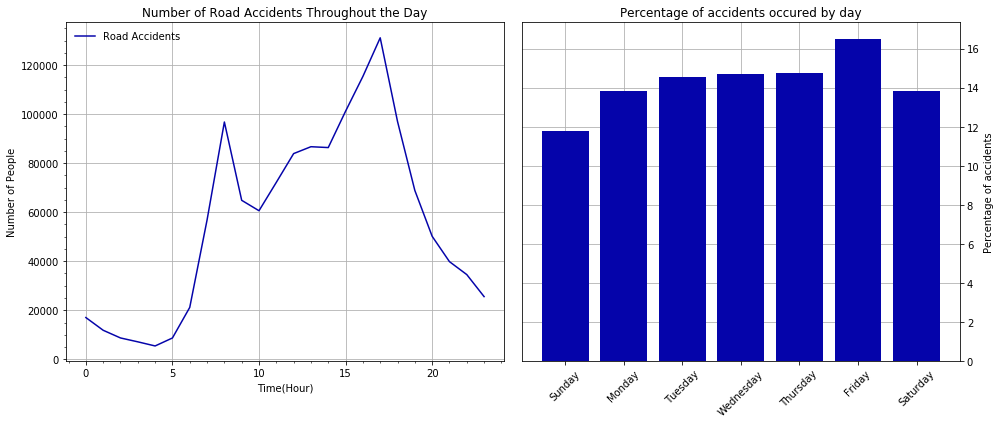

In [73]:
#Create the plot for both figures:
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

#Plot for the hour of day:
ax.plot(hour, number_of_accidents_hour, color='#0504aa')
ax.legend(['Road Accidents'],loc='upper left',frameon=False)
ax.set_title('Number of Road Accidents Throughout the Day')
ax.set_ylabel('Number of People')
ax.minorticks_on()
ax.set_xlabel('Time(Hour)')
ax.grid(True)

#Plot fo the day of the week:
ax2.bar(x1_, y1, color='#0504aa', zorder=3)
ax2.set_ylabel('Percentage of accidents')
ax2.set_xticklabels(x2, rotation=45)
ax2.set_title("Percentage of accidents occured by day")
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.grid(True, zorder=0)
fig.tight_layout()

plt.savefig('DayHour.png')

### Plot: Accidents by Speed Limit:

In [76]:
#First plot over speeding: 
#Creating needed variables:
speed_20 = len(joined[joined['Speed_limit']==20.0])
speed_30 = len(joined[joined['Speed_limit']==30.0])
speed_40 = len(joined[joined['Speed_limit']==40.0])
speed_50 = len(joined[joined['Speed_limit']==50.0])
speed_60 = len(joined[joined['Speed_limit']==60.0])
speed_70 = len(joined[joined['Speed_limit']==70.0])
total_accidents_speed = speed_20 + speed_30 + speed_40 + speed_50 + speed_60 + speed_70
#Percentage:
speed_20_pct = speed_20 / total_accidents_speed * 100
speed_30_pct = speed_30 / total_accidents_speed * 100
speed_40_pct = speed_40 / total_accidents_speed * 100
speed_50_pct = speed_50 / total_accidents_speed * 100
speed_60_pct = speed_60 / total_accidents_speed * 100
speed_70_pct = speed_70 / total_accidents_speed * 100
#Defining variabels:
x = ['20 mph.', '30 mph.', '40 mph.', '50 mph.','60 mph.', '70 mph.']
y = [speed_20_pct, speed_30_pct, speed_40_pct, speed_50_pct, speed_60_pct, speed_70_pct]
x_ = list(range(len(x)))

#Creating second plot, showing the serious and fatal accidents. 
fataldata = joined[joined['Accident_Severity']==1]
speed_20_ = len(fataldata[fataldata['Speed_limit']==20.0])
speed_30_ = len(fataldata[fataldata['Speed_limit']==30.0])
speed_40_ = len(fataldata[fataldata['Speed_limit']==40.0])
speed_50_ = len(fataldata[fataldata['Speed_limit']==50.0])
speed_60_ = len(fataldata[fataldata['Speed_limit']==60.0])
speed_70_ = len(fataldata[fataldata['Speed_limit']==70.0])
total_accidents_ = speed_20_ + speed_30_ + speed_40_ + speed_50_ + speed_60_ + speed_70_
#Percentage:
speed_20_pct_ = speed_20_ / total_accidents_ * 100
speed_30_pct_ = speed_30_ / total_accidents_ * 100
speed_40_pct_ = speed_40_ / total_accidents_ * 100
speed_50_pct_ = speed_50_ / total_accidents_ * 100
speed_60_pct_ = speed_60_ / total_accidents_ * 100
speed_70_pct_ = speed_70_ / total_accidents_ * 100

x3 = ['20 mph.', '30 mph.', '40 mph.', '50 mph.','60 mph.', '70 mph.']
x33 = ['','20 mph.', '30 mph.', '40 mph.', '50 mph.','60 mph.', '70 mph.'] #Needed for Subplot
y3 = [speed_20_pct_, speed_30_pct_, speed_40_pct_, speed_50_pct_, speed_60_pct_, speed_70_pct_]
x3_ = list(range(len(x3)))

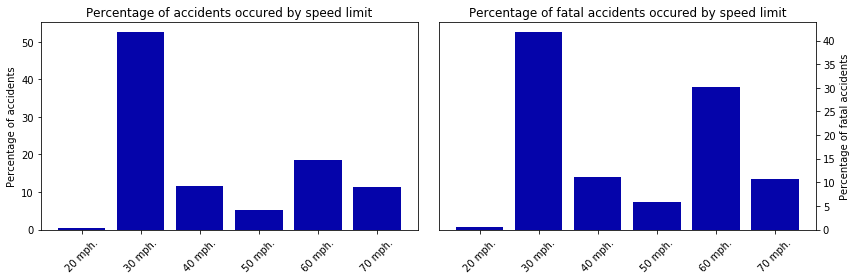

In [78]:
#Collecting the plots in one figure:
fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax3.bar(x_, y, color='#0504aa')
ax3.set_ylabel('Percentage of accidents')
ax3.set_xticklabels(x33, rotation=45)
ax3.set_title("Percentage of accidents occured by speed limit")

ax4.bar(x3_, y3, color='#0504aa')
ax4.set_ylabel('Percentage of fatal accidents')
ax4.set_xticklabels(x33, rotation=45)
ax4.set_title("Percentage of fatal accidents occured by speed limit")
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()

fig2.tight_layout()
plt.savefig('Speedlimit.png')

### Plot: Accidents by Gender:

In [114]:
#Loop for all accidents per gender:
gender_1 = []
fatal_accident_per_gender_1 = []
for i in range(1,3):
    gender_1.append(i)
    fatal_accident_per_gender_1.append(len(joined[(joined['Sex_of_Driver'] == i)]))
    
total_1 = sum(fatal_accident_per_gender_1)
percentage_1 = np.array(fatal_accident_per_gender_1) / total_1

#Label for plot
x5 = ['Male', 'Female']

#Loop for fatal and serious accidents per gender relative to total number of accidents:
gender_2 = []
fatal_accident_per_gender_2 = []
for i in range(1,3):
    gender_2.append(i)
    fatal_accident_per_gender_2.append(len(joined[(joined['Sex_of_Driver'] == i) & (joined['Accident_Severity'] == 1)]))

total_2 = sum(fatal_accident_per_gender_2)
fatal_accident_per_gender_3 = np.array(fatal_accident_per_gender_2)
percentage_2 = fatal_accident_per_gender_3 / total_1

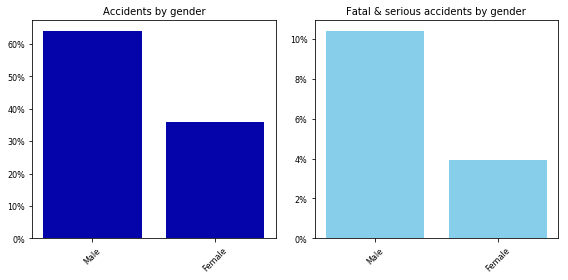

In [103]:
fig4, (ax8, ax9) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax8.bar(x5, percentage_1, color='#0504aa')
ax8.set_xticklabels(x5, rotation=45, size=8)
ax8.set_title("Accidents by gender", size=10)
vals2 = ax8.get_yticks()
ax8.set_yticklabels(['{:,.0%}'.format(x5) for x5 in vals2], size=8) #edit "1" to "2" if more decimals are needed.

ax9.bar(x5, percentage_2, color='skyblue')
ax9.set_xticklabels(x5, rotation=45, size=8)
ax9.set_title("Fatal & serious accidents by gender", size=10)
vals = ax9.get_yticks()
ax9.set_yticklabels(['{:,.0%}'.format(x5) for x5 in vals], size=8) #edit "1" to "2" if more decimals are needed.

fig4.tight_layout()
plt.savefig('Gender.png')

### Plot: Accidents by Age:

In [105]:
#We will only consider legal drivers, which is at minumum 17 years old in UK: 
age = []
accident_per_age = []
for i in range(17, max(joined['Age_of_Driver'])): #+1) perhaps?
    age.append(i)
    accident_per_age.append(len(joined[(joined['Age_of_Driver'] == i) ]))
#print(age)
#print(accident_per_age)

#Age relative to serious and fatal accidents:
age2 = []
accident_per_age2 = []
for i in range(17, max(joined['Age_of_Driver'])): #+1) perhaps?
    age2.append(i)
    accident_per_age2.append(len(joined[(joined['Age_of_Driver'] == i) & (joined['Accident_Severity'] == 1) ]))
#print(age2)
#print(accident_per_age2)

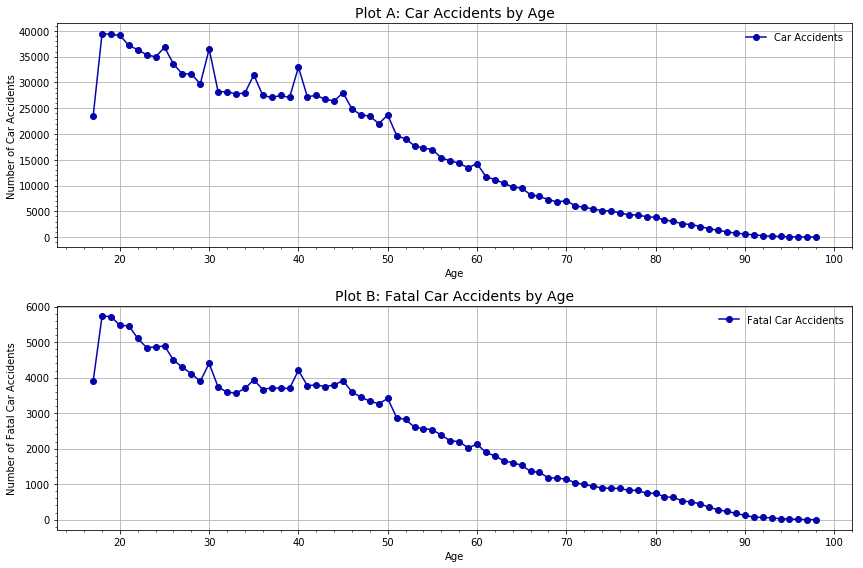

In [106]:
fig3, (ax6, ax7) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

#Figure 1: 
ax6.plot(age, accident_per_age, color='#0504aa', marker = 'o')
ax6.legend(['Car Accidents'],loc='upper right',frameon=False)
ax6.set_title('Plot A: Car Accidents by Age', size=14)
ax6.set_ylabel('Number of Car Accidents', size =10)
ax6.minorticks_on()
ax6.set_xlabel('Age', size =10)
ax6.get_yaxis().set_label_coords(-0.05,0.5)
ax6.grid(True)

#Figure2:
ax7.plot(age2, accident_per_age2, color='#0504aa', marker = 'o')
ax7.legend(['Fatal Car Accidents'],loc='upper right',frameon=False)
ax7.set_title('Plot B: Fatal Car Accidents by Age', size=14)
ax7.set_ylabel('Number of Fatal Car Accidents', size =10)
ax7.minorticks_on()
ax7.set_xlabel('Age', size =10)
ax7.grid(True)
ax7.get_yaxis().set_label_coords(-0.05,0.5)
fig3.tight_layout()

plt.savefig('AgeCar.png')

### Plot: Accidents by Weather:

In [129]:
#Loop for all accidents per weather condition:
weather = []
accident_per_weather_1 = []
for i in range(1,3):
    weather.append(i)
    accident_per_weather_1.append(len(joined[(joined['Weather_Conditions'] == i)]))
    
total_weather_1 = sum(accident_per_weather_1)
percentage_weather_1 = np.array(accident_per_weather_1) / total_weather_1

#Loop for fatal & serious accident:
weather_2 = []
fatal_accident_per_weather_1 = []
for i in range(1,3):
    weather_2.append(i)
    fatal_accident_per_weather_1.append(len(joined[(joined['Weather_Conditions'] == i) & (joined['Accident_Severity'] == 1) ]))
    
total_weather_2 = sum(fatal_accident_per_weather_1)
percentage_weather_2 = np.array(fatal_accident_per_weather_1) / total_weather_1
#Calculate percentage of fatal & serious accidents relative to number of accidents in the specific condition: 
percentage_weather = np.array(fatal_accident_per_weather_1) / np.array(accident_per_weather_1)

#Label for plot
x_weather = ['Dry', 'Rain']

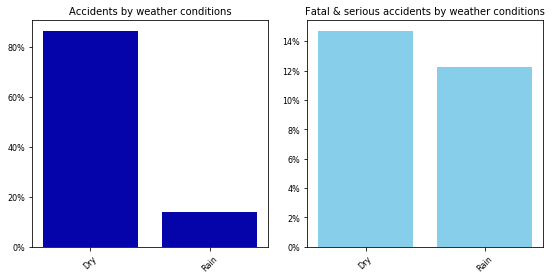

In [132]:
fig4, (ax10, ax11) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax10.bar(x_weather, percentage_weather_1, color='#0504aa')
ax10.set_xticklabels(x_weather, rotation=45, size=8)
ax10.set_title("Accidents by weather conditions", size=10)
vals3 = ax11.get_yticks()
ax10.set_yticklabels(['{:,.0%}'.format(x_weather) for x_weather in vals3], size=8) #edit "1" to "2" if more decimals are needed.

ax11.bar(x_weather, percentage_weather, color='skyblue')
ax11.set_xticklabels(x_weather, rotation=45, size=8)
ax11.set_title("Fatal & serious accidents by weather conditions", size=10)
vals4 = ax11.get_yticks()
ax11.set_yticklabels(['{:,.0%}'.format(x_weather) for x_weather in vals4], size=8) #edit "1" to "2" if more decimals are needed.

fig4.tight_layout()
plt.savefig('Weather.png')

### Plot: Road Condtitions: 

In [135]:
#Loop for all accidents per road condtion:
road_con = []
accident_per_road_con_1 = []
for i in range(1,3):
    road_con.append(i)
    accident_per_road_con_1.append(len(joined[(joined['Road_Surface_Conditions'] == i)]))
    
total_road_1 = sum(accident_per_road_con_1)
percentage_road_1 = np.array(accident_per_road_con_1) / total_road_1

#Loop for fatal & serious accident:
road_2 = []
fatal_accident_per_road_con = []
for i in range(1,3):
    road_2.append(i)
    fatal_accident_per_road_con.append(len(joined[(joined['Road_Surface_Conditions'] == i) & (joined['Accident_Severity'] == 1) ]))
    
total_road_2 = sum(fatal_accident_per_road_con)
percentage_road_2 = np.array(fatal_accident_per_road_con) / total_road_2
#Calculate percentage of fatal & serious accidents relative to number of accidents in the specific condition: 
percentage_road = np.array(fatal_accident_per_road_con) / np.array(accident_per_road_con_1)

#Label for plot
x_road = ['Dry Road', 'Wet Road']

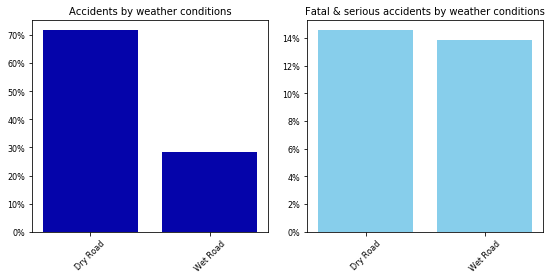

In [136]:
fig5, (ax12, ax13) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax12.bar(x_road, percentage_road_1, color='#0504aa')
ax12.set_xticklabels(x_road, rotation=45, size=8)
ax12.set_title("Accidents by weather conditions", size=10)
vals5 = ax12.get_yticks()
ax12.set_yticklabels(['{:,.0%}'.format(x_road) for x_road in vals5], size=8) #edit "1" to "2" if more decimals are needed.

ax13.bar(x_road, percentage_road, color='skyblue')
ax13.set_xticklabels(x_road, rotation=45, size=8)
ax13.set_title("Fatal & serious accidents by weather conditions", size=10)
vals6 = ax13.get_yticks()
ax13.set_yticklabels(['{:,.0%}'.format(x_road) for x_road in vals6], size=8) #edit "1" to "2" if more decimals are needed.

fig5.tight_layout()
plt.savefig('Road.png')